In [1]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np
import neuralNet as nn
import matplotlib.pyplot as plt
import copy

In [2]:
all_data = loadmat("../ex3data1.mat")
X_all = all_data['X']
y_all = all_data['y']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size = .9)
y_classes = np.unique(y_train)
classDict = dict(zip(range(len(y_classes)),y_classes))

/Users/johnsnyder/.virtualenvs/neuralNetTut/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
print(X_train.shape,X_test.shape)
print(classDict)
print(y_classes)

(4500, 400) (500, 400)
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10}
[ 1  2  3  4  5  6  7  8  9 10]


In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train).transpose()
y_train_onehot = label_binarize(y_train,y_classes).transpose()

X_test_scaled = scaler.transform(X_test).transpose()
y_test_onehot = label_binarize(y_test,y_classes).transpose()

In [6]:
print(scaler.mean_[25])
print(np.mean(X_train,axis=0)[25])

8.931442144758953e-05
8.931442144758953e-05


In [7]:
neuralNetMutExc = nn.fullyConnectClassHyper(X_train_scaled,y_train_onehot,classDict,[25,25,25], alpha =.05, p_keep = 1.0, regular = {"lambd":0.0, "N":2})

In [8]:
neuralNetMutExc.fit(100,X_test_scaled,y_test_onehot)

array([2.04556738e+00, 1.07435294e+00, 5.73041489e-01, 3.79665487e-01,
       2.89401211e-01, 2.38992848e-01, 2.06795284e-01, 1.75942792e-01,
       1.53316151e-01, 1.36900174e-01, 1.21950930e-01, 1.07086435e-01,
       9.73746748e-02, 8.86976233e-02, 7.96034949e-02, 7.16018296e-02,
       6.54270161e-02, 6.02318593e-02, 5.47990339e-02, 5.03699988e-02,
       4.65353741e-02, 4.15063998e-02, 3.82445814e-02, 3.48121795e-02,
       3.21137244e-02, 3.00834388e-02, 2.69557248e-02, 2.51053826e-02,
       2.30927045e-02, 2.06970986e-02, 1.95191966e-02, 1.76507342e-02,
       1.56815284e-02, 1.41981237e-02, 1.32610050e-02, 1.18918291e-02,
       1.11320712e-02, 1.02326738e-02, 9.74291908e-03, 9.04073115e-03,
       8.52522641e-03, 7.97308379e-03, 7.55912206e-03, 7.29742766e-03,
       6.85384051e-03, 6.52115514e-03, 6.17160070e-03, 5.81617452e-03,
       5.68709328e-03, 5.32996428e-03, 5.12884599e-03, 4.96724586e-03,
       4.69954751e-03, 4.57182001e-03, 4.37676532e-03, 4.20484909e-03,
      

1.5608569869131252


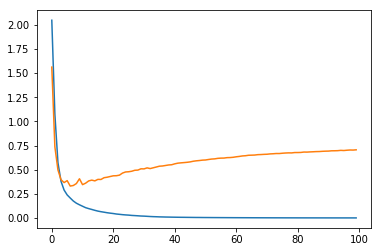

In [9]:
print(neuralNetMutExc.test_loss_vec[0])
plt.plot(neuralNetMutExc.train_loss_vec)
plt.plot(neuralNetMutExc.test_loss_vec)
plt.show()

In [27]:
#update hyperparameters
hyperDict = {"alpha":.01,"regular":{"lambd":0.03, "N":2}}
neuralNetMutExc.updateHyperparam(**hyperDict)

In [28]:
neuralNetMutExc.updateHyperparam(fakeParam = 2,fakeParam2 = 5)

The following are not valid hyperparameter names
 ['fakeParam2', 'fakeParam']
These are the hyperparameters and their values:
regular :  {'lambd': 0.03, 'N': 2}
alpha :  0.01
gradNorm :  inf
gradClip :  inf
p_keep :  1.0


In [29]:
neuralNetMutExc.fit(100,X_test_scaled,y_test_onehot)

array([0.19020777, 0.19316791, 0.19567823, 0.19794361, 0.19931796,
       0.20131582, 0.20255703, 0.20361314, 0.2043147 , 0.20532181,
       0.20629754, 0.20725178, 0.20775097, 0.20813625, 0.20846984,
       0.20918027, 0.20953572, 0.20983252, 0.21019041, 0.21055523,
       0.21065392, 0.21105803, 0.21117082, 0.21162714, 0.21194344,
       0.21204672, 0.21215142, 0.21217825, 0.21222298, 0.21241528,
       0.21280364, 0.2126283 , 0.21282424, 0.21313553, 0.21323124,
       0.21346793, 0.2131372 , 0.21378161, 0.21355831, 0.21375314,
       0.21375192, 0.21378374, 0.21343383, 0.21375703, 0.21377   ,
       0.21403751, 0.21390534, 0.21413504, 0.21409132, 0.21423152,
       0.21460662, 0.21427648, 0.2143443 , 0.21419884, 0.21433004,
       0.21459723, 0.21423675, 0.21438855, 0.21466002, 0.21452895,
       0.21468878, 0.21480304, 0.21462164, 0.21468751, 0.21480916,
       0.21487897, 0.21465104, 0.21459874, 0.214736  , 0.21477563,
       0.21481863, 0.21432597, 0.21507961, 0.21502957, 0.21478

2.0455673829488488


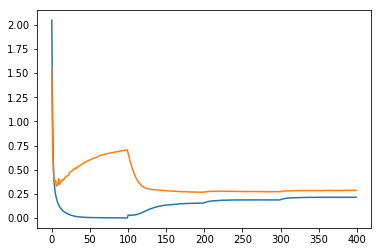

In [30]:
print(neuralNetMutExc.train_loss_vec[0])
plt.plot(neuralNetMutExc.train_loss_vec)
plt.plot(neuralNetMutExc.test_loss_vec)
plt.show()

In [31]:
YHat, loss = neuralNetMutExc.predict(X_test_scaled,y_test_onehot)
print(YHat.shape)
max_ind = np.argmax(YHat,axis = 0)
max_prob = np.amax(YHat,axis = 0)
max_prob_class = [neuralNetMutExc.outputL.classVec[x] for x in max_ind]

print(len(max_prob_class))
print(len(y_test))

(10, 500)
500
500


In [32]:
print(YHat[:,:15])
print(max_prob_class)
print(y_test.transpose())
unique, counts = np.unique(y_test, return_counts = True)
dict(zip(unique,counts))

[[1.30417154e-04 8.96915518e-01 1.98442824e-02 1.56006551e-05
  9.43092676e-01 7.84280279e-04 5.09964203e-04 8.58431870e-03
  1.73817734e-02 8.91831471e-01 4.00778230e-02 1.09429727e-03
  8.93381867e-01 7.00650015e-03 5.53533666e-03]
 [5.71105019e-04 1.57391892e-02 3.59550919e-03 9.93560702e-01
  1.19041436e-02 7.84280279e-04 8.07357719e-04 1.99321188e-03
  9.07896869e-01 1.69392121e-02 7.96452646e-01 1.28194900e-03
  3.49581896e-02 8.68438986e-01 8.09234596e-04]
 [1.08350206e-03 2.45253218e-03 1.30784251e-02 3.00089853e-05
  9.73870053e-03 7.84280279e-04 5.11862175e-03 1.47462052e-03
  5.39361547e-02 8.23149678e-03 4.61045349e-02 4.80411108e-03
  2.12419185e-02 4.73431786e-03 8.09234596e-04]
 [6.63295138e-05 6.25422790e-03 6.61757722e-03 8.95451530e-06
  5.97851011e-03 3.23344291e-02 5.09964203e-04 2.56329252e-02
  7.73654001e-04 7.46361396e-03 1.64569704e-03 3.83596429e-03
  3.56394152e-03 5.13702851e-03 9.39263259e-01]
 [7.31060589e-05 3.57725881e-03 2.24601984e-02 8.95451530e-06
  

{1: 50, 2: 47, 3: 48, 4: 59, 5: 57, 6: 34, 7: 41, 8: 57, 9: 48, 10: 59}

In [33]:
print("accuracy:",np.mean(max_prob_class==y_test.transpose()))

accuracy: 0.922
